# Importing Libraries

In [318]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc
%config InlineBackend.figure_format = 'retina'
import scipy.optimize as so

In [319]:
def rk4(f,dt,u0,t0):
    k1 = dt*f(u0,t0)
    k2 = dt*f(u0+0.5*k1,t0+0.5*dt)
    k3 = dt*f(u0+0.5*k2,t0+0.5*dt)
    k4 = dt*f(u0+k3,t0+dt)
    return u0+(k1+2*k2+2*k3+k4)/6.0


def evolve(f,t0,t1,N,u0,tol,step):
    T,dt = np.linspace(t0,t1,N,retstep=True)
    U = np.array([u0 for n in range(0,N)])
    for n in range(0,N-1):
        U[n+1] = step(f,dt,U[n],T[n])
        p,_ = U[n+1]
        if (p<tol): # Setting up the tol variable
            T= T[0:n+1] # Storing the values of radii
            U= U[0:n+1] # Storing the values of mass and pressure
            break     
    return T, U


# The Tolman-Oppenheimer-Volkov Equation : Newtonian Formulation 

The structure equations for stars from classical mechanics can be written as:
$$
\begin{align}
\frac{dp}{dr} &= - \frac{G\rho(r)M(r)}{r^{2}}&= -\frac{G\epsilon(r)M(r)}{c^{2}r^{2}}
\end{align}
$$
$$
\begin{align}
\frac{dM(r)}{dr} &= 4\pi r^{2}\rho(r) &= \frac{4\pi r^{2}\epsilon(r)}{c^{2}}
\end{align}
$$

Where  p is the central pressure, $\rho(r)$ is the density, M(r) is the total mass inside the sphere of radius r  and $\epsilon(r)$ is the corresponding energy density of a star. G is the Newton's gravitational constant and c is the speed of light.

Our goal is to integrate these coupled first order differential equations and calculate the mass and radius of a star. For that, we need to find a relation between the energy density and the central pressure of a star. This relation is given by the equation of state for a star. We will look at various models for developing an equation of state for a star.


# Fermi gas model for electrons
For free electrons, the Fermi momentum $k_{f}$ is given in terms of number of states per unit volume n as
$$
\begin{align}
k_{f} = \hbar(3\pi^{2}n)^{\frac{1}{3}}
\end{align}
$$

Since the star is electrically neutral, there must a proton for each electron. Proton resides in the atomic nucleus accompanied by a neutron. In our calculations for the white dwarf stars, we will use $^{56}Fe$ nucleus. The mass of an electron can be ignored in comparison to the mass of a nucleon. The mass density $\rho$ of the star is given as:
$$
\begin{align}
\rho = nm_{N}\frac{A}{Z}
\end{align}
$$
where A is the mass number and Z is the atomic number of an atom or $\frac{A}{Z}$ is the number of nucleons per each electron and $m_{N}$ is mass of the nucleon. The value of A/Z for $^{56}Fe$ is 2.154. Now, the fermi momentum can be written as a function of the mass density as 
$$
\begin{align}
k_{f} = \hbar\left(\frac{3\pi^{2}\rho}{m_{N}}\frac{Z}{A}\right)^{\frac{1}{3}}
\end{align}
$$
Then, the energy density can be calculated as $\rho c^{2}$. 

The dispersion relationship for a Fermi gas at temperature T = 0 is given as E = $(k^{2}c^{2} + m_{e}^{2}c^{4})^{1/2}$. The contribution to the energy density from the electrons $\epsilon_{elec}$ is given as
$$
\begin{align}
\epsilon_{elec}(k_{f}) = \frac{8\pi}{(2\pi\hbar)^{3}}\int_{0}^{k_{f}} (k^{2}c^{2} + m_{e}^{2}c^{4})^{1/2} k^{2} dk
\end{align}
$$

$$
\begin{align}
\epsilon_{elec}(k_{f}) = \frac{m_{e}^{4}c^{5}}{8\pi^{2}\hbar^{3}}\left[\left(2x^{3}+x\right)\left(1+x^{2}\right)^{\frac{1}{2}} - sinh^{-1}(x)\right]
\end{align}
$$
where x = $\frac{k_{f}}{m_ec}$. 

The total energy density is $\epsilon = nm_{N}\frac{A}{Z}c^{2} + \epsilon_{elec}(k_{f})$.

From the first law of thermodynamics, the pressure can be written as 
$$
\begin{align}
p = -\left[\frac{\partial U}{\partial V}\right]_{T=0} = n^{2}\frac{d(\epsilon/n)}{dn} = n\frac{d\epsilon}{dn} - \epsilon = n\mu - \epsilon
\end{align}
$$
We consider an equilibrium mix of the electrons, protons and neutrons such that $\mu$ is the chemical potential.

The pressure can be written in terms of Fermi momentum as:
$$
\begin{align}
p(k_{f}) = \frac{8\pi}{3c(2\pi\hbar)^{3}}\int_{0}^{k_{f}} (k^{2}c^{2} + m_{e}^{2}c^{4})^{-1/2} k^{4} dk
\end{align}
$$

$$
\begin{align}
p(k_{f}) = \frac{m_{e}^{4}c^{5}}{24\pi^{2}\hbar^{3}}\left[\left(2x^{3}-3x\right)\left(1+x^{2}\right)^{\frac{1}{2}} + 3sinh^{-1}(x)\right]
\end{align}
$$

To begin, we are interested in the equation of state for the relativistic ($k_{f}>>m_{e}c$) and non-relativistic case ($k_{f}<<m_{e}c$).

For relativistic case, the equation of state  is calculated as 
$$
\begin{align}
p(k_{f}) = \frac{m_{e}^{4}c^{5}}{12\pi^{2}\hbar^{3}}\left(\frac{k_{f}}{m_{e}c}\right)^{4} = \frac{\hbar c}{12\pi^{2}}\left(\frac{3\pi^{2}Z\rho}{m_{N}A}\right)^{\frac{4}{3}} \approx K_{rel}\epsilon^{\frac{4}{3}}
\end{align}
$$
where 
$$
\begin{align}
K_{rel} = \frac{\hbar c}{12\pi^{2}}\left(\frac{3\pi^{2}Z}{m_{N}Ac^{2}}\right)^{\frac{4}{3}}
\end{align}
$$
An equation of the form p = K$\epsilon^{\gamma}$ is called a polytrope. Therefore, relativistic electron Fermi gas follows a polytropic equation of state with $\gamma = \frac{4}{3}$.

Similarly, we have a polytropic equation of state for nonrelativistic case,
$$
\begin{align}
p = K_{nonrel}\epsilon^{\frac{5}{3}}
\end{align}
$$
where
$$
\begin{align}
K_{nonrel} = \frac{\hbar^{2}}{15\pi^{2}m_{e}}\left(\frac{3\pi^{2}Z}{m_{N}Ac^{2}}\right)^{\frac{5}{3}}
\end{align}
$$

# Scaling the TOV equations

We will express the radius and mass of the star in units of km and $M_{sun}$. Therefore, we define a dimensionless mass $\bar{M}$(r) = $\frac{M(r)}{M_{sun}}$. Then, the first equation in the Newtonian formulation becomes
$$
\begin{align}
\frac{dp}{dr} &= -R_{0}\frac{\epsilon(r)\bar{M}(r)}{r^{2}}
\end{align}
$$
where the constant $R_{0}$ = $\frac{GM_{sun}}{c^{2}}$. Since the units of energy density and pressure are both J/$m^{3}$, we define a dimensionless pressure $\bar{p}$ and energy density $\bar{\epsilon}$ such that
$$
\begin{align}
p = \epsilon_{0}\bar{p}
\end{align}
$$
$$
\begin{align}
\epsilon = \epsilon_{0}\bar{\epsilon}
\end{align}
$$
where $\epsilon_{0}$ is a free parameter with units same as energy density. Its choice is arbitrary, and a suitable strategy is to make its choice based on the  value of dimensional numbers that define the problem.

The dimensionless polytropic equation can be written as
$$
\begin{align}
\bar{p} = \bar{K}\bar{\epsilon}^{\gamma}
\end{align}
$$
where $\bar{K}$ = $K\epsilon_{0}^{\gamma-1}$

Using the dimensionless polytropic equation, the first structure equation becomes
$$
\begin{align}
\frac{d\bar{p}}{dr} &= -\frac{\alpha\bar{p}^{1/\gamma}(r)\bar{M}(r)}{r^{2}}
\end{align}
$$
where the constant $\alpha$ is 
$$
\begin{align}
\alpha = \frac{R_{0}}{\bar{K}^{\frac{1}{\gamma}}} = \frac{R_{0}}{(K\epsilon_{0}^{\gamma-1})^{\frac{1}{\gamma}}}
\end{align}
$$
It is evident from the above equation that $\alpha$ has units of km.
A useful relation is to write $\epsilon_{0}$ in terms of $\alpha$ so that later, we can choose a value of $\alpha$ to get an appropriate value of $\epsilon_{0}$.
$$
\begin{align}
\epsilon_{0} = \left[\frac{1}{K}\left(\frac{R_{0}}{\alpha}\right)^{\gamma}\right]^{\frac{1}{\gamma-1}}
\end{align}
$$
Similarly, the second equation can be scaled and written as below
$$
\begin{align}
\frac{d\bar{M}(r)}{dr} =  \beta r^{2}\bar{p}(r)^{\frac{1}{\gamma}}
\end{align}
$$
where constant $\beta$ is 
$$
\begin{align}
\beta = \frac{4\pi\epsilon_{0}}{M_{sun}c^{2}\bar{K}^{\frac{1}{\gamma}}}
\end{align}
$$

# Global Variables

In [320]:
Ms = 1.989e30 # Mass of sun in kg
R0 = sc.G*Ms/sc.c**2 # one-half the Schwartzchild radius of sun in metres

In [321]:
def Newton(u,t):
    p,m = u
    # Scaled Differential equations
    dp = -α*p**(1/γ)*m/(t**2)
    dm = β*t**2*(p**(1/γ))
    return np.array([dp,dm])
   

# Structure of White Dwarf stars
A dwarf star is small in size as it burns its entire nuclear fuel and does not possess any additional thermal pressure to prevent its gravity from crushing it down. As the density of the star increases, the electrons are pushed together till they reach the ground state and arrange in the lowest energy levels. Electrons are fermions and the Pauli exclusion principle states that two fermions cannot be in the same state which in turn leads to degeneracy pressure. This degeneracy pressure opposes gravity and accounts for the stability of the star.

Since the value of $\frac{GM}{c^{2}R} \approx 10^{-4}$ for a typical white dwarf star, we can use Newtonian formulation to solve their structure (masses and radii).

Further, we use the Fermi gas model for electrons to calculate the equation of state for the star. In our calculations, we considered the $^{56}Fe$ nucleus. The value of A/Z for $^{56}Fe$ is 2.154. 

# Relativistic case ($k_{f}$>>$m_{e}$c)

In [322]:
# Relativistic case 
γrel = 4/3
# mass of nucleon taken as an average mass of proton and a neutron
mn = (sc.m_p+sc.m_n)/2
# Nucleons per electron for 56Fe atom
Z = 26
A = 56
# Value of Krel
Krel = (sc.hbar*sc.c/(12*(sc.pi**2)))*((3*sc.pi**2*Z)/(A*mn*sc.c**2))**(γrel)
# Guessing a value of α to start with
α = R0
# Calculating value of ϵ0
ϵ0 = ((1/Krel)*(R0/α)**γrel)**(1/(γrel-1))
# Value of Kbar
Kbar = Krel*ϵ0**(γrel-1)
# Value of β
β = 4*sc.pi*ϵ0/(Ms*sc.c**2*(Kbar)**(1/γrel)) 
# Scaling each constant so that unit of length is in kms
α = α/(10**3)
ϵ0 = ϵ0*(10**3)**3
β = β*(10**3)**3
γ = γrel

In [323]:
print(f"The value of α, β and ϵ0 is {np.round(α,4)} kms, {np.round(β,4)} km^(3) and {np.round(ϵ0/1e47,3)}e47 Jkm^(-3)")

The value of α, β and ϵ0 is 1.4771 kms, 52.9925 km^(3) and 7.538e47 Jkm^(-3)


# Implementation Details

The coupled structure equations are quite non-linear. Due to the factor $\bar{p}^{\frac{1}{\gamma}}$ in the differential equation, the exact solution will be negative when $\bar{p}<0$ which happens for r>R (Radius of the star). 

Therefore, we set a tolerance variable in our evolve method which is hand tuned such that our python programs does not complain/warn about the invalid (complex) values encountered in the double scalars. Since we want the maximum value of r as the radius before the exact solutions become complex, the value of tol variable is different for different initial conditions ($\bar{p}(0)$).

In [324]:
# Since the differential equations diverge at r = 0 so it is shifted ever so slightly
r0 = 0+1e-20
# upper limit in kms
r_end = 5
# Number of steps
N =1000
# Tolerance
tol = 1e-10
# Initial condition 
p0 = 1.0
m0 = 0.0  # at r = 0 mass is always 0
u0 = np.array([p0,
               m0])

T1,U1= evolve(Newton,r0,r_end,N,u0,tol,step=rk4)

P, M = U1[:,0],U1[:,1]

print(f"The radius of the star is {np.round(T1[-1],4)} km.")

The radius of the star is 1.5415 km.


# What went wrong?

The radius of the star R $\approx$ 1.5 km. A typical whie dwarf star has a radius on the order of $10^{4}$ km. This happened due to the our initial value of pressure $\bar{p}(0) = 1.0$.

If we take a dwarf star such that its mass M $\approx$ $M_{sun}$, then we can calculate the average energy density of the star as 
$$
\langle\epsilon\rangle \approx \frac{M_{sun}c^{2}}{R^{3}} = 1.79\cdot10^{35} Jkm^{-3}
$$
This value is $10^{12}$ orders of magnitude smaller than our chosen value of $\epsilon_{0}$. Additionally, the pressure p is $10^{3}$ orders of magnitude smaller than $\epsilon$. Therefore, for the same value $\epsilon_{0}$ (free parameter), we choose an initial value of $\bar{p}(0)\approx10^{-15}$ (satisfies the relativistic Fermi gas condition).

We start with a $\bar{M}$(0) = 0 and choose three values of $\bar{p}(0)$ i.e., $10^{-14}$, $10^{-15}$ and $10^{-16}$ which satisfy the relativistic condition $k_{f}$>>$m_{e}$c.  Then we will observe how the mass and radius changes for these different values of pressure in the relativistic case.

In [325]:
r0 = 0+1e-20
r_end = 20000 # larger upper limit of about 20000 km now
N =10000      # more number of steps
tol = 1e-27   # hand tuned for such a small initial value of the pressure 
p0 = 1.0e-14  # new initial guess (more physical)
m0 = 0.0
u0 = np.array([p0,
               m0])

T1,U1= evolve(Newton,r0,r_end,N,u0,tol,step=rk4)

P1, M1 = U1[:,0],U1[:,1]

print(f" The radius of the star is {np.round(T1[-1],4)} km and the mass of the star is {np.round(M1[-1],4)} times the mass of the sun")


 The radius of the star is 4920.492 km and the mass of the star is 1.2355 times the mass of the sun


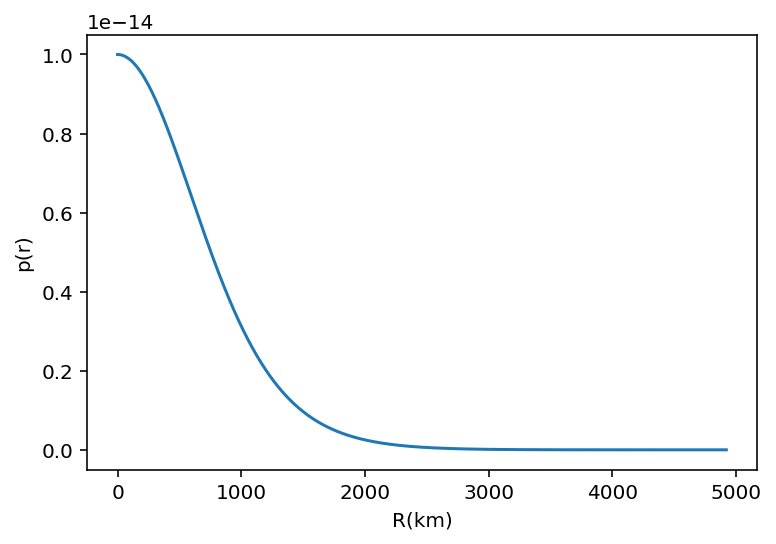

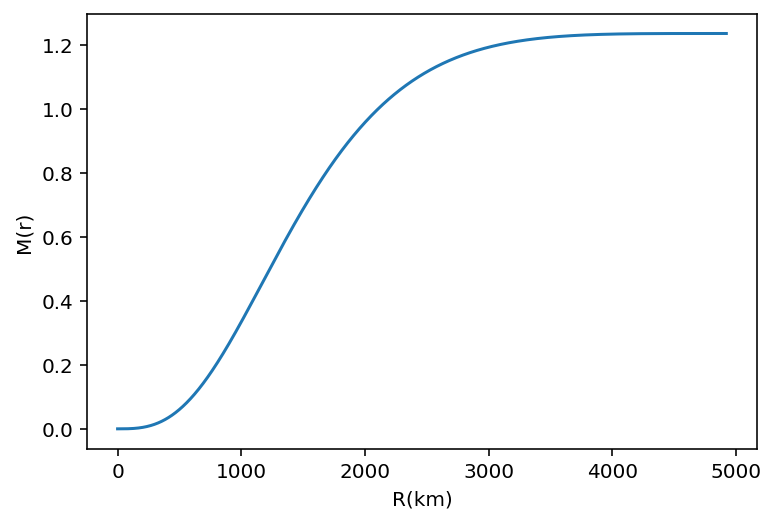

In [326]:
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('p(r)')
plt.plot(T1,P1)
plt.show()
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('M(r)')
plt.plot(T1,M1)
plt.show()

In [327]:
tol = 1e-30 # Increased Tolerance
p0 = 1.0e-15 # p(0) = 1e-15
u0 = np.array([p0,
               m0])

T2,U2= evolve(Newton,r0,r_end,N,u0,tol,step=rk4)

P2, M2 = U2[:,0],U2[:,1]
print(f" The radius of the star is {np.round(T2[-1],4)} km and the mass of the star is {np.round(M2[-1],4)} times the mass of the sun")

 The radius of the star is 8760.8761 km and the mass of the star is 1.2355 times the mass of the sun


In [328]:
tol = 1e-31
p0 = 1.0e-16
u0 = np.array([p0,
               m0])

T3,U3= evolve(Newton,r0,r_end,N,u0,tol,step=rk4)

P3, M3 = U3[:,0],U3[:,1]
print(f" The radius of the star is {np.round(T3[-1],4)} km and the mass of the star is {np.round(M3[-1],4)} times the mass of the sun")

 The radius of the star is 15579.558 km and the mass of the star is 1.2355 times the mass of the sun


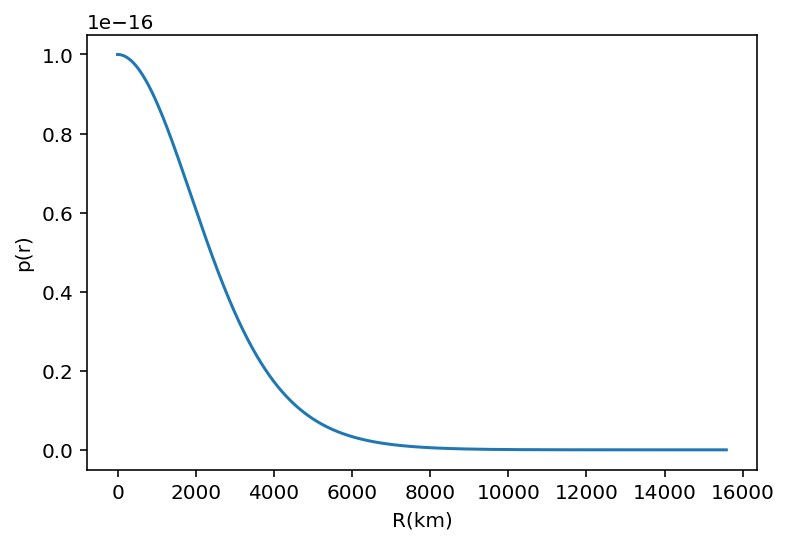

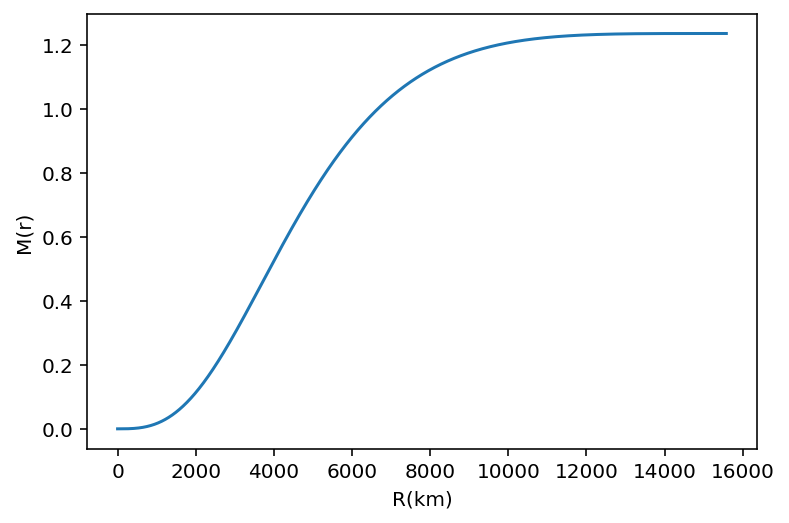

In [329]:
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('p(r)')
plt.plot(T3,P3)
plt.show()
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('M(r)')
plt.plot(T3,M3)
plt.show()

Common Plot

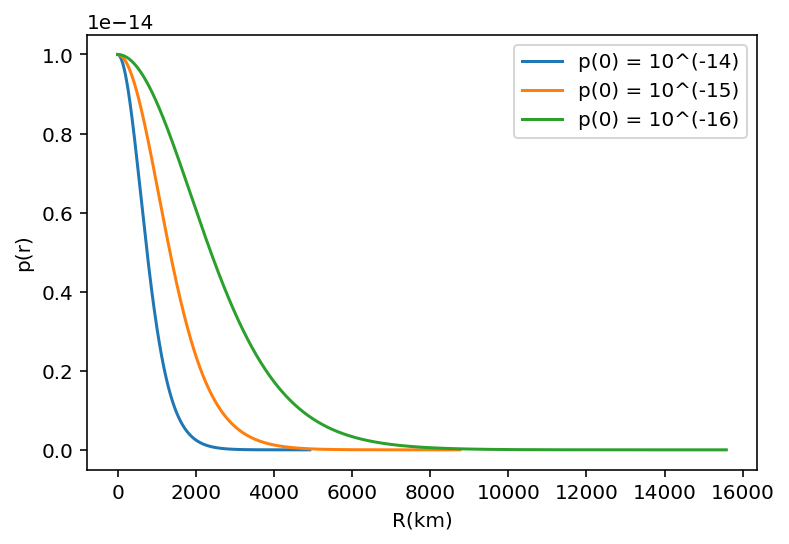

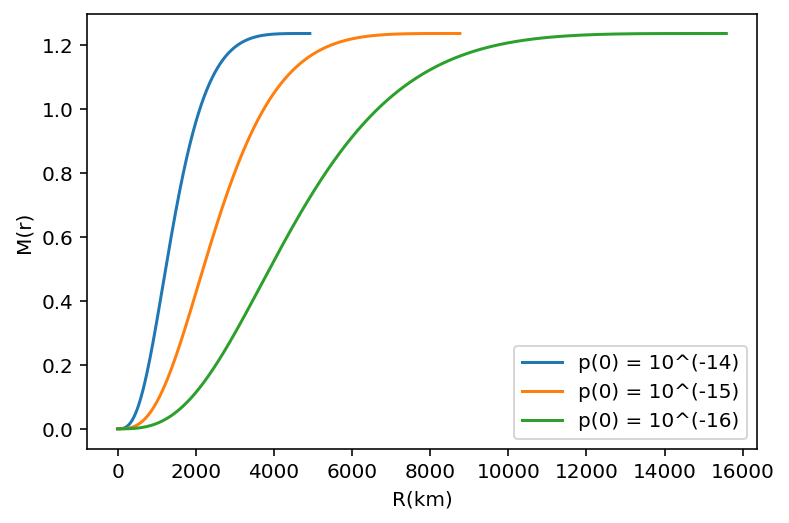

In [330]:
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('p(r)')
plt.plot(T1,P1, label = 'p(0) = 10^(-14)')
plt.plot(T2,10*P2, label = 'p(0) = 10^(-15)') # Appropriate scaling
plt.plot(T3,100*P3, label = 'p(0) = 10^(-16)')
plt.legend()
plt.show()
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('M(r)')
plt.plot(T1,M1, label = 'p(0) = 10^(-14)')
plt.plot(T2,M2, label = 'p(0) = 10^(-15)')
plt.plot(T3,M3, label = 'p(0) = 10^(-16)')
plt.legend()
plt.show()

The values for different initial values of central pressure are tabulated below

| $\bar{p}$(0) | R(km) | $\bar{M}$ ($M_{sun}$) |
| --- | --- | --- |
| 10^{-14} | 4920 | 1.2355 |
| 10^{-15} | 8761 | 1.2355 |
| 10^{-16} | 15580 | 1.2355 |




# Why are masses same?

The answer lies in the solution of the Lane-Emden equation. The Lane–Emden equation is a dimensionless form of Poisson's equation for the gravitational potential of a Newtonian self-gravitating, spherically symmetric, polytropic fluid. It is named after astrophysicists Jonathan Homer Lane and Robert Emden. The equation reads
$$
\begin{align}
\frac{1}{\xi^{2}}\frac{d}{d\xi}\left(\xi^{2}\frac{d\theta}{d\xi}\right) + \theta^{n} = 0
\end{align}
$$
where $\xi$ is the dimensionless radius and $\theta$ is related to density and pressure by $\rho = \rho_{c}\theta^{n}$ for central density $\rho_{c}$. The index n is the polytropic index that appears in the polytropic equation of state.

For a polytropic equation of state p = $\epsilon^{\gamma}$, the mass M is 
$$
\begin{align}
M = 4\pi\epsilon^{2(\gamma-4/3)/3} \left(\frac{K\gamma}{4\pi G(\gamma-1)}\right)^{\frac{3}{2}}\zeta^{2}_{1}|\theta(\zeta_{1})|
\end{align}
$$
and radius R is 
$$
\begin{align}
R = \sqrt{\frac{K\gamma}{4\pi G(\gamma-1)}}\zeta_{1}\epsilon^{(\gamma-2)/2}
\end{align}
$$
where $\zeta_{1}$ and $\theta(\zeta_{1})$ are the numerical constants dependent on the polytropic index $\gamma$. From the above equations, we can see that for $\gamma = \frac{4}{3}$, mass m is independent of density $\epsilon$ and hence, the central pressure $p_{0}$. Radius R on the other hand, decreases with with increasing central pressure $R\propto p_{0}^{(\gamma-2)/2\gamma} = p_{0}^{-\frac{1}{4}}$, which is also evident from the above tabulated results.

# Non Relativistic Case ($k_{f}$<<$m_{e}$c)

In [331]:
# Non-relativistic case
γnrel = 5/3
Knrel = (sc.hbar**2/(15*sc.pi**2*sc.m_e))*(3*sc.pi**2*Z/(A*mn*sc.c**2))**(γnrel)
# Choosen such that kf<<mec (using trial and error)
α = 50
ϵ0 = ((1/Knrel)*(R0/α)**γnrel)**(1/(γnrel-1))
# Value of Kbar
Kbar = Knrel*ϵ0**(γnrel-1)
# Value of β
β = 4*sc.pi*ϵ0/(Ms*sc.c**2*(Kbar)**(1/γnrel))
# Scaling each constant so that unit of length is in kms
α = α/(10**3)
ϵ0 = ϵ0*(10**3)**3
β = β*(10**3)**3
γ = γnrel

In [332]:
print(f"The value of α, β and ϵ0 is {np.round(α,4)} kms, {np.round(β,4)} km^(3) and {np.round(ϵ0/1e47,3)}e47 Jkm^(-3)")

The value of α, β and ϵ0 is 0.05 kms, 0.006 km^(3) and 0.025e47 Jkm^(-3)


We start with a $\bar{M}$(0) = 0 and choose three values of $\bar{p}(0)$ i.e., $10^{-15}$ and $10^{-16}$ which satisfy the non-relativistic condition $k_{f}$<<$m_{e}$c.  Then we will observe how the mass and radius changes for these different values of pressure in the non-relativistic case.

In [333]:
r0 = 0+1e-20
r_end = 20000 
N =10000 
tol = 1e-24
# more physical initial value
p0 = 1e-15
m0 = 0.0
u0 = np.array([p0,
               m0])

T1,U1= evolve(Newton,r0,r_end,N,u0,tol,step=rk4)

P1, M1 = U1[:,0],U1[:,1]
print(f" The radius of the star is {np.round(T1[-1],4)} km and the mass of the star is {np.round(M1[-1],4)} times the mass of the sun")


 The radius of the star is 10569.0569 km and the mass of the star is 0.3927 times the mass of the sun


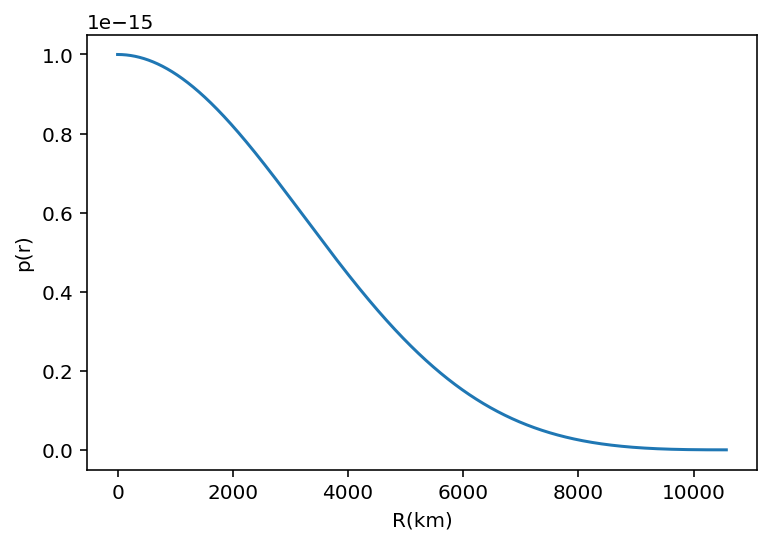

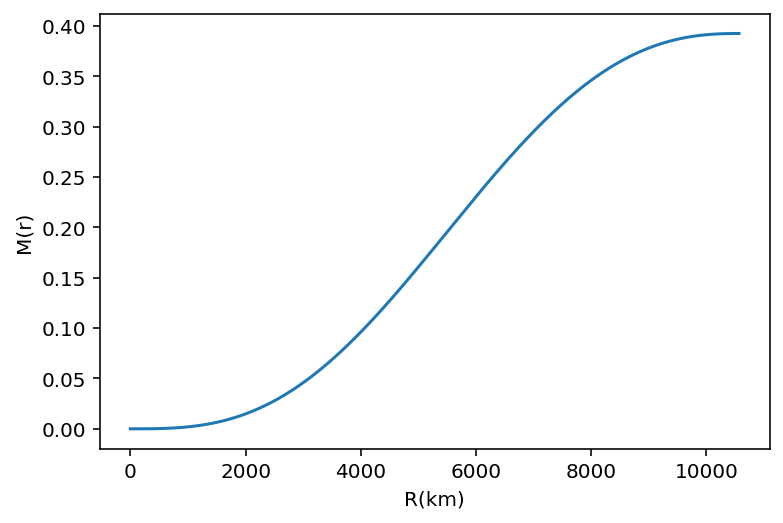

In [334]:
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('p(r)')
plt.plot(T1,P1)
plt.show()
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('M(r)')
plt.plot(T1,M1)
plt.show()

In [335]:
tol = 1e-25
p0 = 1e-16
u0 = np.array([p0,
               m0])

T2,U2= evolve(Newton,r0,r_end,N,u0,tol,step=rk4)

P2, M2 = U2[:,0],U2[:,1]
print(f" The radius of the star is {np.round(T2[-1],4)} km and the mass of the star is {np.round(M2[-1],4)} times the mass of the sun")

 The radius of the star is 13305.3305 km and the mass of the star is 0.1968 times the mass of the sun


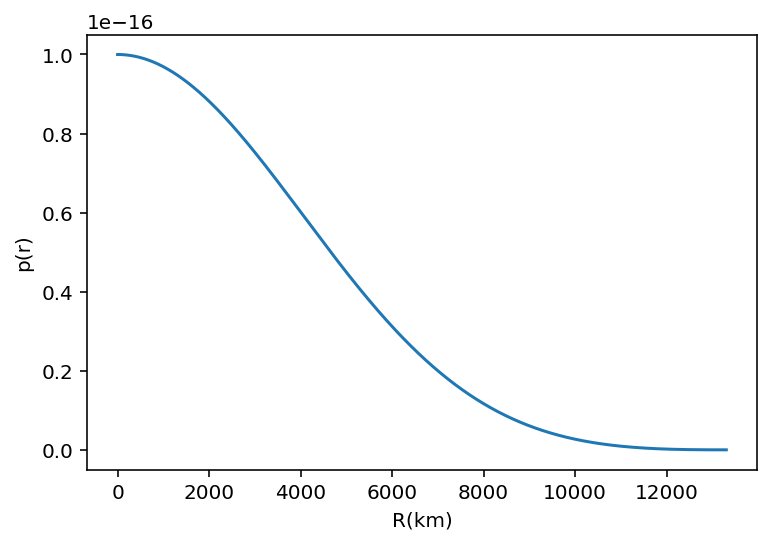

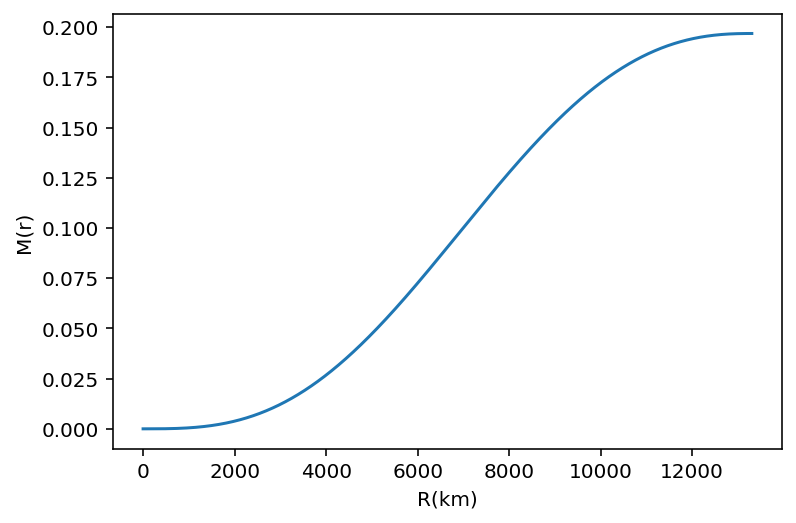

In [336]:
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('p(r)')
plt.plot(T2,P2)
plt.show()
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('M(r)')
plt.plot(T2,M2)
plt.show()

Common Plot

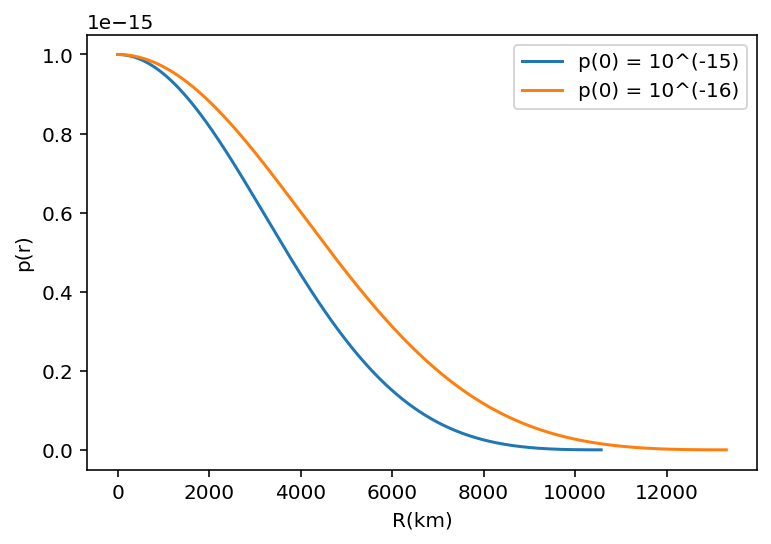

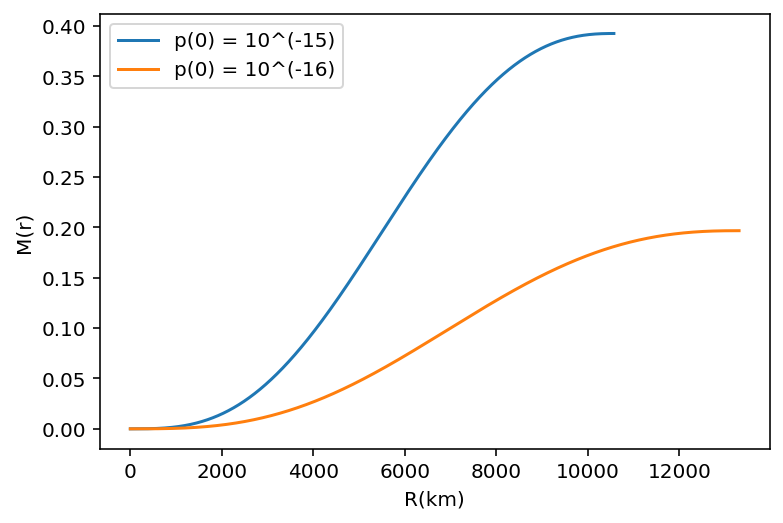

In [337]:
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('p(r)')
plt.plot(T1,P1, label = 'p(0) = 10^(-15)')
plt.plot(T2,10*P2, label = 'p(0) = 10^(-16)') # Appropriate scaling
plt.legend()
plt.show()
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('M(r)')
plt.plot(T1,M1, label = 'p(0) = 10^(-15)')
plt.plot(T2,M2, label = 'p(0) = 10^(-16)')
plt.legend()
plt.show()

The values for different initial values of central pressure are tabulated below

| $\bar{p}$(0) | R(km) | $\bar{M}$ ($M_{sun}$) |
| --- | --- | --- |
| 10^{-15} | 10569 | 0.3927 |
| 10^{-16} | 13305 | 0.1968 |



# Neutron Stars

# Adding General Relativistic corrections to the TOV structure equations

The general relativistic effects become important as the ratio $\frac{GM}{c^{2}R}$ becomes non-negligible, which happens in the case of neutron stars.

The first structure equation can now be written as
$$
\begin{align}
\frac{dp}{dr} = -\frac{G\epsilon(r)M(r)}{c^{2}r^{2}}\left[1 +\frac{p(r)}{\epsilon(r)}\right]\left[1 +\frac{4\pi r^{3}p(r)}{M(r)c^{2}}\right]\left[1-\frac{2 GM(r)}{c^{2}r}\right]^{-1}
\end{align}
$$
The first two brackets are a consequence of special relativity and the last bracket is the GR correction. One important thing to note is that the term in each bracket is dimensionless. This will make our lives easier when we scale this differential equation.

The second structure equation is same as before
$$
\begin{align}
\frac{dM(r)}{dr} = \frac{4\pi r^{2}\epsilon(r)}{c^{2}}
\end{align}
$$

# Scaling the TOV equation

Using the same strategy and the parameters we defined for the Newtonian formulation, the scaled TOV equation can be written as
$$
\begin{align}
\frac{d\bar{p}}{dr} = -\frac{\alpha\bar{p}^{1/\gamma}(r)\bar{M}(r)}{r^{2}}\left[1 +\bar{K}^{\frac{1}{\gamma}}\bar{p}(r)^{\gamma-1}\right]\left[1 +\frac{b\bar{p}(r)r^{3}}{\bar{M}(r)}\right]\left[1-\frac{2 R_{0}\bar{M}(r)}{r}\right]^{-1}
\end{align}
$$
where b is
$$
\begin{align}
b = \frac{4\pi\epsilon_{0}}{M_{sun}c^{2}}
\end{align}
$$
The second equation is same as before
$$
\begin{align}
\frac{d\bar{M}(r)}{dr} =  \beta r^{2}\bar{p}(r)^{\frac{1}{\gamma}}
\end{align}
$$

In [338]:
def TOV(u,t):
    p,m = u
    b = (ϵ0/(Ms*sc.c**2))*4*sc.pi # Calculating constant b (defined above)
    A =  -(α*p**(1/γ)*m/(t**2))   # Newtonian term
    # Special Relativistic Corrections
    B =  (1+(Kbar**(1/γ)*p**(γ-1))) 
    C = (1+(b*p*t**3/m))
    D = (1-(2*R0_*m/t))**(-1) # General Relativsitic Corrections
    # Calculating the coupled differential equation
    dp = A*B*C*D          
    dm = β*t**2*(p**(1/γ))
    return np.array([dp,dm])





# Non-Relativistic Neutron Gas  ($k_{f}$<<$m_{n}$c)

The non-relativistic neutron gas also obeys the polytropic equation of state with polytropic index $\gamma$ = $\frac{5}{3}$. The value of $K_{nonrel}$ (constant of proportionality) is same as in the non-relativistic electron gas with a difference, we now have mass of neutron $m_{n}$ in it instead of the mass of electron $m_{e}$.
$$
\begin{align}
K_{nonrel} = \frac{\hbar^{2}}{15\pi^{2}m_{n}}\left(\frac{3\pi^{2}}{m_{N}c^{2}}\right)^{\frac{5}{3}}
\end{align}
$$
One important thing to note is that there isn't any factor of $\frac{Z}{A}$ in the above equation as we consider pure neutron star.

In [341]:
γnrel = 5/3 # Polytropic index for non relativistic neutron gas
Knrel = ((sc.hbar**2/(15*sc.pi**2*sc.m_n))*(3*sc.pi**2/(sc.m_n*sc.c**2))**(γnrel))
# Choosing value of α to fix ϵ0
α = 1000
ϵ0 = ((1/Knrel)*(R0/α)**γnrel)**(1/(γnrel-1))
Kbar = Knrel*ϵ0**(γnrel-1)
β = 4*sc.pi*ϵ0/(Ms*sc.c**2*(Kbar)**(1/γnrel))
α = α/(10**3)
ϵ0 = ϵ0*(10**3)**3
β = β*(10**3)**3
# This variable will be use in TOV function, so scaling it in km as well
R0_ = R0/(10**3)
γ = γnrel

In [342]:
print(f"The value of α, β, ϵ0 and Kbar is {np.round(α,4)} kms, {np.round(β,4)} km^(3), {np.round(ϵ0/1e47,3)}e47 Jkm^(-3) and {np.round(Kbar,4)}")

The value of α, β, ϵ0 and Kbar is 1.0 kms, 0.7743 km^(3), 0.163e47 Jkm^(-3) and 1.9157


# Comparing structure values from Newtonian Formulation and General Relativity corrections

We start with a $\bar{M}$(0) = 0 and choose three values of $\bar{p}(0)$ i.e., $10^{-4}$, $10^{-5}$ and $10^{-6}$ which satisfy the non-relativistic condition $k_{f}$<<$m_{n}$c.  Then we will observe how the mass and radius changes for these different values of pressure in the non-relativistic case.  We will try the same initial values of pressure in the Netwonian formulation and analyze the difference between the results for this more dense star.

In [343]:
r0 = 0+1e-20
r_end = 30
N =10000
tol = 1e-13
p0 = 1e-4
m0 = 0.0
u0 = np.array([p0,
               m0])

T1_N,U1_N= evolve(Newton,r0,r_end,N,u0,tol,step=rk4)

P1_N, M1_N = U1_N[:,0],U1_N[:,1]
print(f" The radius of the star is {np.round(T1_N[-1],4)} km and the mass of the star is {np.round(M1_N[-1],4)} times the mass of the sun")

 The radius of the star is 16.4836 km and the mass of the star is 0.7692 times the mass of the sun


In [344]:
r0 = 0.0001
r_end = 30
N =10000
tol = 1e-13
p0 = 1e-4
m0 = 0+1e-10 # Now there is a singularity at M = 0 in the GR corrections
u0 = np.array([p0,
               m0])

T1_GR,U1_GR= evolve(TOV,r0,r_end,N,u0,tol,step=rk4)

P1_GR, M1_GR = U1_GR[:,0],U1_GR[:,1]
print(f" The radius of the star is {np.round(T1_GR[-1],4)} km and the mass of the star is {np.round(M1_GR[-1],4)} times the mass of the sun")

 The radius of the star is 15.2536 km and the mass of the star is 0.6127 times the mass of the sun


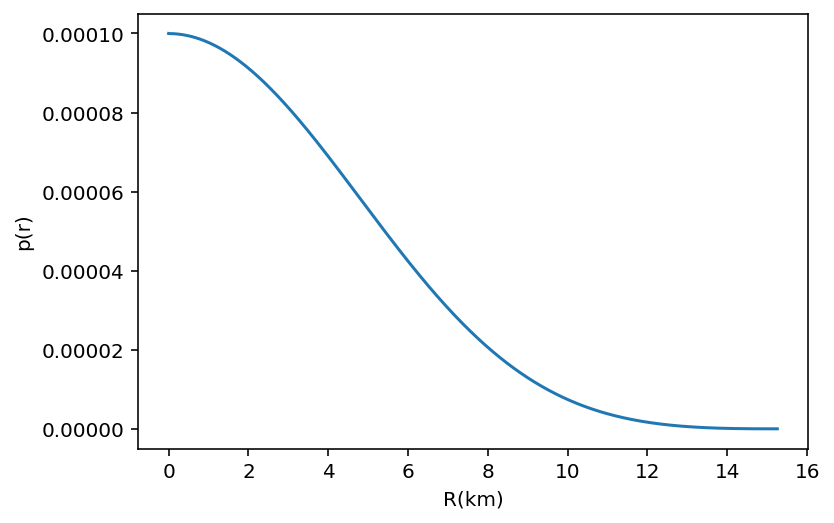

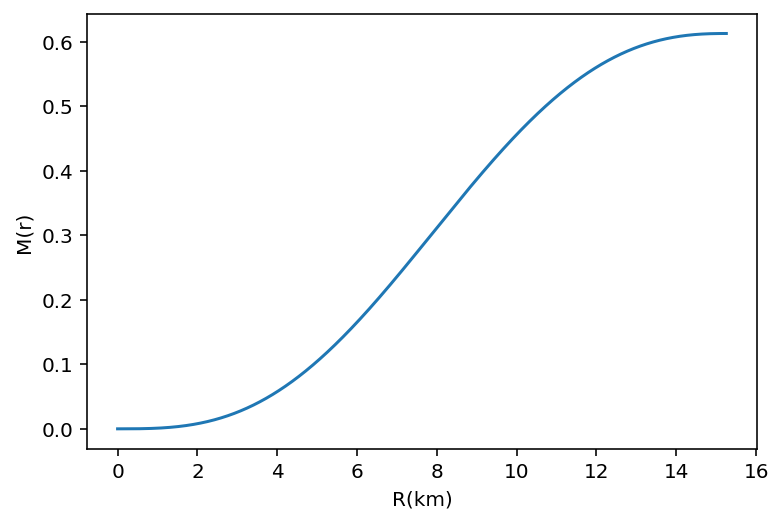

In [345]:
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('p(r)')
plt.plot(T1_GR,P1_GR)
plt.show()
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('M(r)')
plt.plot(T1_GR,M1_GR)
plt.show()

In [346]:
r0 = 0+1e-20 
r_end = 30
N =10000
tol = 1e-14
p0 = 1e-5
m0 = 0.0
u0 = np.array([p0,
               m0])

T2_N,U2_N= evolve(Newton,r0,r_end,N,u0,tol,step=rk4)

P2_N, M2_N = U2_N[:,0],U2_N[:,1]
print(f" The radius of the star is {np.round(T2_N[-1],4)} km and the mass of the star is {np.round(M2_N[-1],4)} times the mass of the sun")


 The radius of the star is 20.7531 km and the mass of the star is 0.3855 times the mass of the sun


In [347]:
r0 = 0.0001
r_end = 30
N =10000
tol = 1e-14
p0 = 1e-5
m0 = 0+1e-10 
u0 = np.array([p0,
               m0])

T2_GR,U2_GR= evolve(TOV,r0,r_end,N,u0,tol,step=rk4)

P2_GR, M2_GR = U2_GR[:,0],U2_GR[:,1]
print(f" The radius of the star is {np.round(T2_GR[-1],4)} km and the mass of the star is {np.round(M2_GR[-1],4)} times the mass of the sun")


 The radius of the star is 20.096 km and the mass of the star is 0.3509 times the mass of the sun


In [348]:
r0 = 0+1e-20
r_end = 30
N =10000
tol = 1e-15
p0 = 1e-6
m0 = 0.0
u0 = np.array([p0,
               m0])

T3_N,U3_N = evolve(Newton,r0,r_end,N,u0,tol,step=rk4)

P3_N, M3_N = U3_N[:,0],U3_N[:,1]
print(f" The radius of the star is {np.round(T3_N[-1],4)} km and the mass of the star is {np.round(M3_N[-1],4)} times the mass of the sun")

 The radius of the star is 26.1266 km and the mass of the star is 0.1932 times the mass of the sun


In [349]:
r0 = 0.0001
r_end = 30
N =10000
tol = 1e-15
p0 = 1e-6
m0 = 0+1e-10
u0 = np.array([p0,
               m0])

T3_GR,U3_GR = evolve(TOV,r0,r_end,N,u0,tol,step=rk4)

P3_GR, M3_GR = U3_GR[:,0],U3_GR[:,1]
print(f" The radius of the star is {np.round(T3_GR[-1],4)} km and the mass of the star is {np.round(M3_GR[-1],4)} times the mass of the sun")

 The radius of the star is 25.7906 km and the mass of the star is 0.186 times the mass of the sun


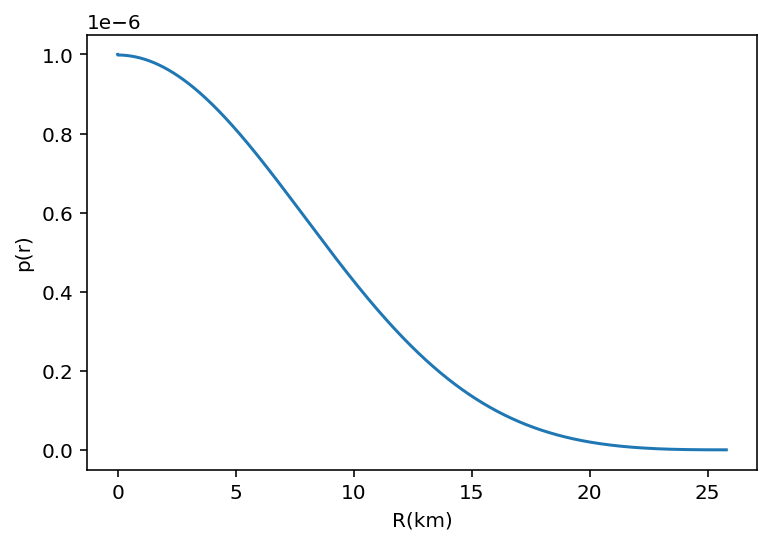

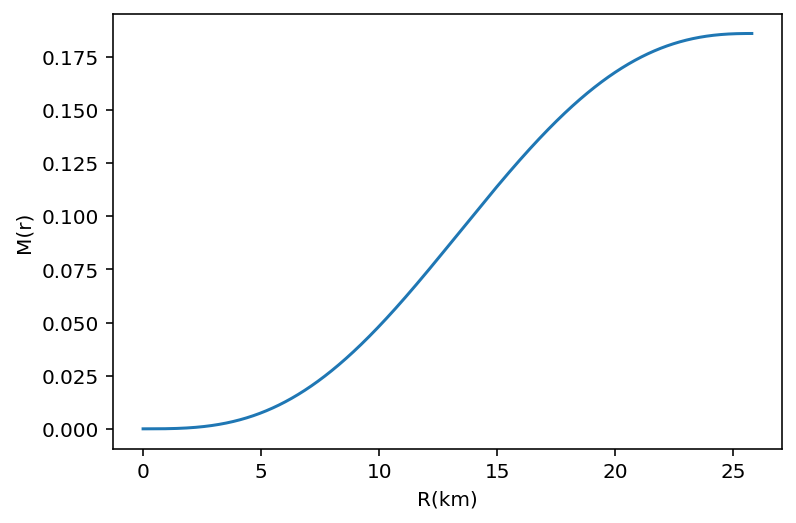

In [350]:
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('p(r)')
plt.plot(T3_GR,P3_GR)
plt.show()
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('M(r)')
plt.plot(T3_GR,M3_GR)
plt.show()

Common Plot

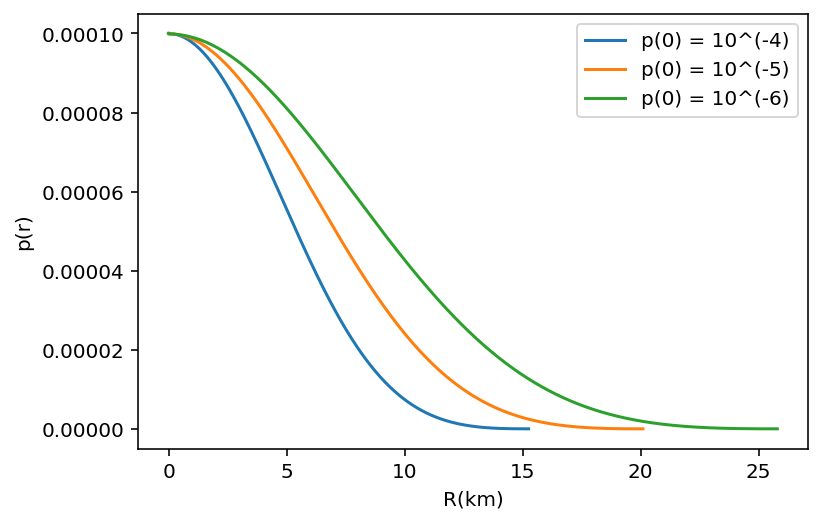

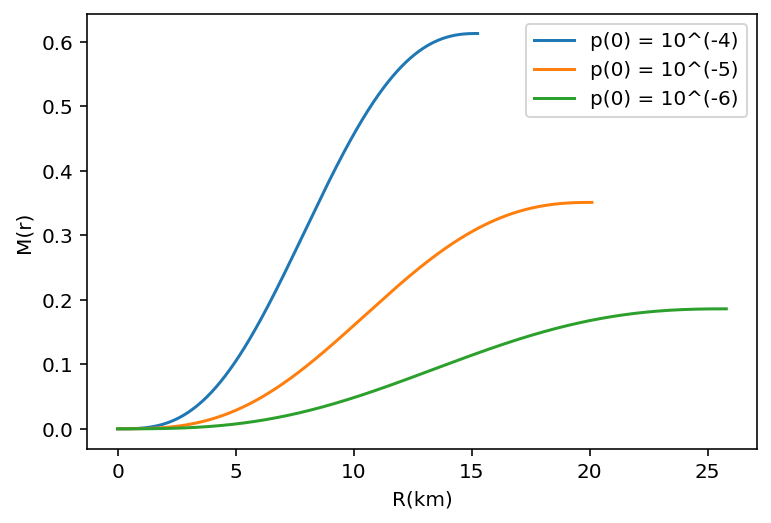

In [351]:
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('p(r)')
plt.plot(T1_GR,P1_GR, label = 'p(0) = 10^(-4)')
plt.plot(T2_GR,10*P2_GR, label = 'p(0) = 10^(-5)')
plt.plot(T3_GR,100*P3_GR, label = 'p(0) = 10^(-6)')
plt.legend()
plt.show()
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('M(r)')
plt.plot(T1_GR,M1_GR, label = 'p(0) = 10^(-4)')
plt.plot(T2_GR,M2_GR, label = 'p(0) = 10^(-5)')
plt.plot(T3_GR,M3_GR, label = 'p(0) = 10^(-6)')
plt.legend()
plt.show()

The values for different initial values of central pressure are tabulated below

| $\bar{p}$(0) | R_Newton(km) | $\bar{M}$_Newton($M_{sun}$) | R_GR (km) | $\bar{M}$_GR ($M_{sun}$) |
| --- | --- | --- | --- | --- |
| 10^{-4} | 16.4836 | 0.7692 | 15.2536 | 0.6127 |
| 10^{-5} | 20.7531 | 0.3855 | 20.096  | 0.3509 |
| 10^{-6} | 26.1266 | 0.1932 | 25.7906 | 0.186  |

# Relativistic Neutron Gas  ($k_{f}$>>$m_{n}$c)

The relativistic neutron gas also obeys the polytropic equation of state with polytropic index $\gamma$ = 1. The polytropic equation of relativistic neutron gas is same as the well known result for a relativistic gas
$$
\begin{align}
p = \frac{\epsilon}{3}
\end{align}
$$
Since $\gamma$ = 1, therefore $K_{rel}$ = $\bar{K}$ = $\frac{1}{3}$

In [352]:
γrel = 1
Krel = 1/3
# Choosing value of α 
α = 3*R0
# Choosing the same value of ϵ0 as previous case
Kbar = Krel*ϵ0**(γrel-1)
β = 4*sc.pi*ϵ0/(Ms*sc.c**2*(Kbar)**(1/γrel))
α = α/(10**3)
γ = γrel

In [353]:
print(f"The value of α, β, ϵ0 and Kbar is {np.round(α,4)} kms, {np.round(β,4)} km^(3), {np.round(ϵ0/1e47,3)}e47 Jkm^(-3) and {np.round(Kbar,4)}")

The value of α, β, ϵ0 and Kbar is 4.4312 kms, 3.4312 km^(3), 0.163e47 Jkm^(-3) and 0.3333


Now, We try a large value of initial pressure ($\bar{p}(0)<10^{-4}$) = $10^{-2}$ in in the relativistic case. As before, $\bar{M}$(0) = 0.

In [354]:
r0 = 0.0001
r_end = 50
N =10000
tol = 1e-13
p0 = 1e-2 # Larger Initial value than the Non-relativstic case
m0 = 0+1e-10
u0 = np.array([p0,
               m0])

T1,U1= evolve(TOV,r0,r_end,N,u0,tol,step=rk4)

P, M = U1[:,0],U1[:,1]
print(f" The radius of the star is {np.round(T1[-1],4)} km and the mass of the star is {np.round(M[-1],4)} times the mass of the sun")


 The radius of the star is 50.0 km and the mass of the star is 6.9881 times the mass of the sun


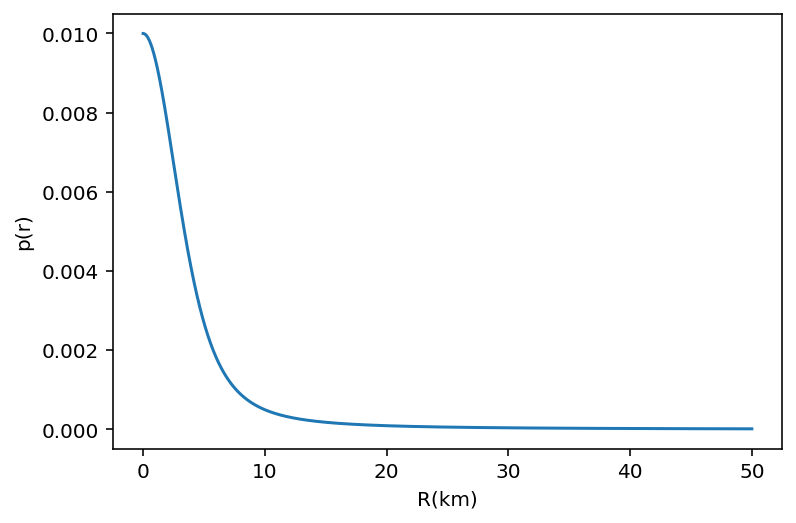

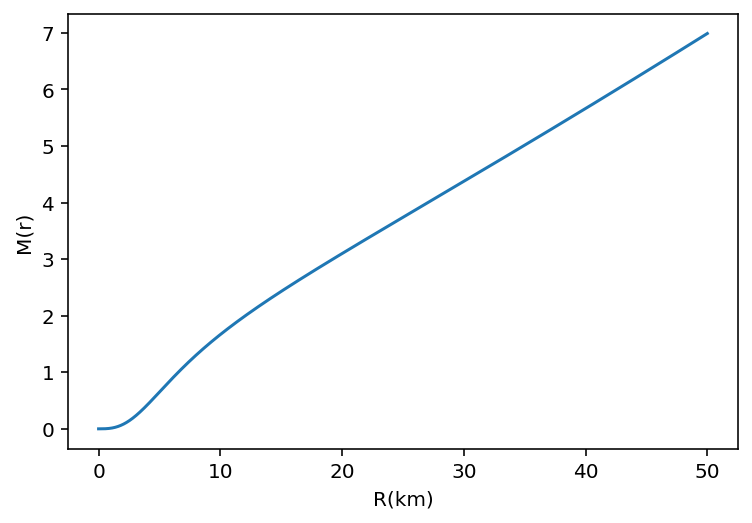

In [355]:
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('p(r)')
plt.plot(T1,P)
plt.show()
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('M(r)')
plt.plot(T1,M)
plt.show()

# What went wrong?

We observe that our code runs for the entire range of radius. Therefore, we get the radius of star to be 50 km. Secondly, we see from the above plot that the value of the mass does not saturate towards the end of the range. This is due to the fact that relativistic gas equation is unsuitable for small pressures ($\bar{p}(0)<10^{-4}$). 

# Equation of State for Arbitrary Relativity

To calculate the structure of the stars starting with small initial pressures ($\bar{p}(0)<10^{-4}$), we need to find a general equation of state which takes into account both low and high pressures. We make an ansatz based on our understanding of the equation of state for relativistic as well as non-relativistic case such that
$$
\begin{align}
\bar{\epsilon}(p) = A_{NR}\bar{p}^{\frac{3}{5}} + A_{R}\bar{p}
\end{align}
$$
The first term dominates for the non-relativistic case and the second term dominates for the relativistic case.

We have already calculated the energy density and pressure of the Fermi gas in terms of the parameter $\frac{k_{f}}{m_{e}c}$. We can perform the same steps to get the equations for neutron gas in terms of the parameter $\frac{k_{f}}{m_{n}c}$.
$$
\begin{align}
\epsilon_{n}(k_{f}) = \frac{3\epsilon_{0}}{8}\left[\left(2x^{3}+x\right)\left(1+x^{2}\right)^{\frac{1}{2}} - sinh^{-1}(x)\right]
\end{align}
$$
$$
\begin{align}
p(k_{f}) = \frac{\epsilon_{0}}{8}\left[\left(2x^{3}-3x\right)\left(1+x^{2}\right)^{\frac{1}{2}} + 3sinh^{-1}(x)\right]
\end{align}
$$
where x = $\frac{k_{f}}{m_{N}c}$ and $\epsilon_{0}$ = $\frac{m_{n}^{4}c^{5}}{3\pi^{2}\hbar^{3}}$

In [356]:
# Value of ϵ0 as defined above
ϵ0 = ((sc.m_n**4)*(sc.c**5))/(3*(sc.pi**2)*sc.hbar**3)
# x = kf/(mn*c)
def p_kf_neutron(x):
    return (ϵ0/8)*((2*x**3-3*x)*(1+x**2)**(0.5)+ 3*np.arcsinh(x))
def ϵ_kf_neutron(x):
    return (3*ϵ0/8)*((2*x**3+x)*(1+x**2)**(0.5)-np.arcsinh(x))

# Range of x values
x = np.linspace(0,3,1000)
# Dimesnionless pressure and energy density
pbar = p_kf_neutron(x)/ϵ0
ϵbar = ϵ_kf_neutron(x)/ϵ0

# General equation of state
def objective(p, Anr,Ar):
    return Anr*p**(3/5)+ Ar*p

# Finding the coeffs Anr and Ar
popt,_ = so.curve_fit(objective,pbar,ϵbar)
Anr = popt[0]
Ar =  popt[1]
print(f" Anr = {np.round(Anr,4)} and Ar = {np.round(Ar,4)}")

 Anr = 2.4308 and Ar = 2.8619


In [357]:
def TOV_Neutron_complete(u,t):
    p,m = u
#     b = (ϵ0/(Ms*sc.c**2))*4*sc.pi
    A =  -(α*(Anr*p**(3/5)+ Ar*p)*m/(t**2))
    B =  (1+(p/(Anr*p**(3/5)+ Ar*p)))
    C = (1+(β*p*t**3/m))
    D = (1-(2*R0_*m/t))**(-1) 
    dp = A*B*C*D          
    dm = β*t**2*((Anr*p**(3/5)+ Ar*p))
    return np.array([dp,dm])

# Similarly Newtonian formulation is adapted to general equation of state
def Newton_Neutron_complete(u,t):
    p,m = u
    dp = -α*(Anr*p**(3/5)+ Ar*p)*m/(t**2)
    dm = β*t**2*(Anr*p**(3/5)+ Ar*p)
    return np.array([dp,dm])


In [358]:
α = R0
β = (4*sc.pi*ϵ0)/(Ms*sc.c**2)
α = α/(10**3)
β = β*(10**3)**3
ϵ0 = ϵ0*(10**3)**3

In [359]:
print(f"The value of α, β and ϵ0 is {np.round(α,4)} kms, {np.round(β,4)} km^(3) and {np.round(ϵ0/1e47,3)}e47 Jkm^(-3)")

The value of α, β and ϵ0 is 1.4771 kms, 0.0386 km^(3) and 0.005e47 Jkm^(-3)


# Comparing structure values from Newtonian Formulation and General Relativistic corrections

Let us try the same initial value of pressure $\bar{p}$(0) =  = $10^{-2}$ as we did in the relativistic case. As before, $\bar{M}$(0) = 0. 

In [360]:
r0 = 0.0001
r_end = 30
N =10000
tol = 1e-11
p0 = 1e-2 # same initial pressure as we had in relativistic case
m0 = 0+1e-10
u0 = np.array([p0,
               m0])

T1_tov,U1_tov= evolve(TOV_Neutron_complete,r0,r_end,N,u0,tol,step=rk4)

P_tov, M_tov = U1_tov[:,0],U1_tov[:,1]
print(f" The radius of the star is {np.round(T1_tov[-1],4)} km and the mass of the star is {np.round(M_tov[-1],4)} times the mass of the sun")

 The radius of the star is 13.2584 km and the mass of the star is 0.7044 times the mass of the sun


In [361]:
r0 = 0+1e-20
r_end = 30
N =10000
tol = 1e-11
p0 = 1e-2
m0 = 0.0
u0 = np.array([p0,
               m0])

T1_N,U1_N= evolve(Newton_Neutron_complete,r0,r_end,N,u0,tol,step=rk4)

P_N, M_N = U1_N[:,0],U1_N[:,1]
print(f" The radius of the star is {np.round(T1_N[-1],4)} km and the mass of the star is {np.round(M_N[-1],4)} times the mass of the sun")

 The radius of the star is 14.8365 km and the mass of the star is 1.0186 times the mass of the sun


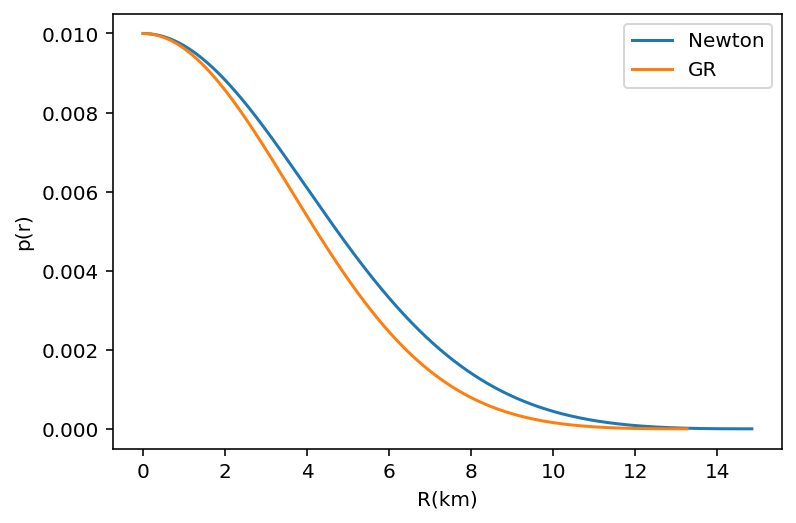

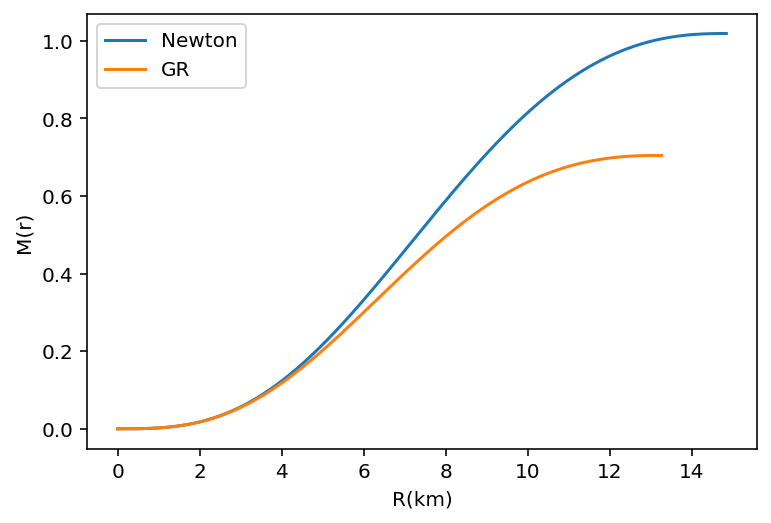

In [362]:
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('p(r)')
plt.plot(T1_N,P_N,label = 'Newton')
plt.plot(T1_tov,P_tov, label = 'GR')
plt.legend()
plt.show()
plt.figure()
plt.xlabel('R(km)')
plt.ylabel('M(r)')
plt.plot(T1_N,M_N, label = 'Newton')
plt.plot(T1_tov,M_tov,label = 'GR')
plt.legend()
plt.show()


From the plots above, we can see that the General Realtivity corrections are more pronounced for the more massive neutron star.

In [313]:
# A special evolve function is written which returns just the mass and radius of the star
def evolve_Neutron_special(f,t0,t1,N,u0,step):
    T,dt = np.linspace(t0,t1,N,retstep=True)
    U = np.array([u0 for n in range(0,N)])
    for n in range(0,N-1):
        U[n+1] = step(f,dt,U[n],T[n])
        p,_ = U[n+1]
# Since tol variable is dependent on the initial value of p, if statement checks for a nan(complex) value now
        if (np.isnan(p)): 
                R = T[n]
            # Storing the values upto previous index now
                T= T[0:n] 
                U= U[0:n]
                break 

    Mass = U[:,1]
    return T[-1], Mass[-1]
    

Now the goal is to plot mass versus the radius of the star for different $\bar{p}$(0) values.

In [314]:
r0 = 0.0001
r_end = 30
N = 2500
# Number of p values
Np = 15000
# Range of p values
p, dp = np.linspace(1e-4,2000e-1,Np, retstep = True)
m0 = 0+1e-10
u0 = np.array([p0,
               m0])

# initializing arrays of radii and masses
Rad_tov = np.zeros(Np)
Mass_tov= np.zeros(Np)

# Storing Radius and Mass for each p value
for i in range(Np):
    Rad_tov[i], Mass_tov[i]= evolve_Neutron_special(TOV_Neutron_complete,r0,r_end,N,np.array([p[i],m0]),step=rk4)                              
            

<ipython-input-307-5fb77952a5d2>:4: RuntimeWarning: invalid value encountered in double_scalars
  A =  -(α*(Anr*p**(3/5)+ Ar*p)*m/(t**2))
<ipython-input-307-5fb77952a5d2>:5: RuntimeWarning: invalid value encountered in double_scalars
  B =  (1+(p/(Anr*p**(3/5)+ Ar*p)))
<ipython-input-307-5fb77952a5d2>:9: RuntimeWarning: invalid value encountered in double_scalars
  dm = β*t**2*((Anr*p**(3/5)+ Ar*p))


Since tol variable is dependent on the initial value $\bar{p}(0)$, the if statement in evolve_Neutron_special() checks for a nan(complex) value now. When it encounters the first nan value, it stops. This is the reason we have runtime warning above.

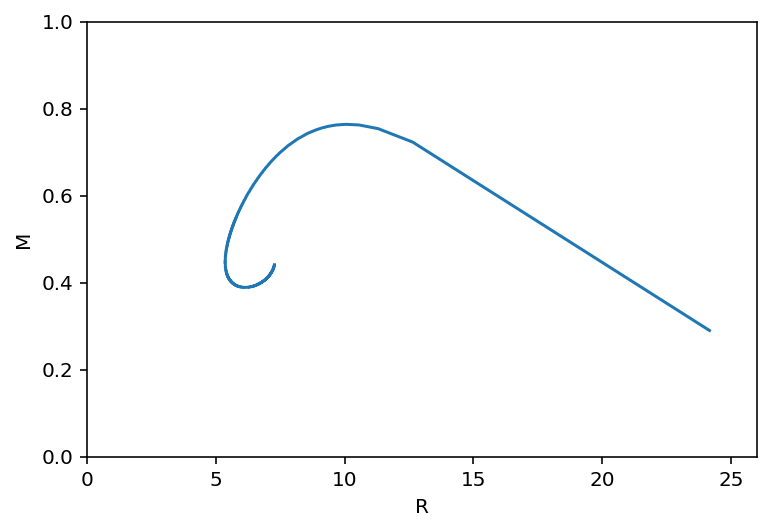

In [315]:
plt.figure()
plt.plot(Rad_tov,Mass_tov)
plt.xlabel('R')
plt.ylim(0,1)
plt.xlim(0,26)
plt.ylabel('M')
plt.show()

In [316]:
print(f"Maximum mass of a pure neutron star is {np.round(np.max(Mass_tov),3)} times the mass of the sun and the radius of the star is {np.round(Rad_tov[np.argmax(Mass_tov)],2)} km. This happens at initial pressure p(0) = {np.round(p[np.argmax(Mass_tov)],4)}")

Maximum mass of a pure neutron star is 0.764 times the mass of the sun and the radius of the star is 10.05 km. This happens at initial pressure p(0) = 0.0534


# Thus, these values agree with Oppenheimer and Volkov's seminal 1939 result for Fermi gas equation of state.

# Nuclear Interaction Model

This section concentrates on including nucleon-nucleon interaction in the equation of state by developing the model of nuclear potential such that general features of nuclear matter are realized. We consider c = 1 and the units of energy and distance in this section will be MeV and fm, respectively.

# Symmetric Nuclear Matter

In this section, we will concentrate on modeling the nuclear potential (and average energy per nucleon) for the symmetric nuclear matter i.e., when number of neutrons N is equal to the number of protons Z or in other words, the neutron density $n_{n}$ is equal to the proton density $n_{p}$. The total nucleon density n = $n_{n} + n_{p}$.  The equilibrium nucleon density is given as $n_{0}$ = 0.16 nucleons/$fm^{3}$. The average binding energy per nucleon BE = $\frac{E}{A}-m_{n}$ = -16  MeV, where $\frac{E}{A}$ is the average energy per nucleon. 

Our goal is to relate $n_{0}$, BE and $K_{0}$ to the energy density $\epsilon$(n) for the symmetric nuclear matter, where $K_{0}$ is the nuclear compressibility. 

The average energy per nucleon can be related to the energy density as
$$
\begin{align}
\frac{E(n)}{A} = \frac{\epsilon(n)}{n}
\end{align}
$$
The nuclear compressibility K(n) is given by the equation below
$$
\begin{align}
K(n) = 9\frac{dp(n)}{n} = 9\left[n^{2}\frac{d^{2}}{dn^{2}}\left(\frac{\epsilon}{n}\right) + 2n\frac{d}{dn}\left(\frac{\epsilon(n)}{n}\right)\right]
\end{align}
$$

Now, let us look at the constraints on the nuclear potential. The function E(n)/A-$m_{n}$ should have minimum at n = $n_{0}$ with depth equal to BE. Therefore, at n = $n_{0}$
$$
\begin{align}
\frac{d}{dn}\left(\frac{E(n)}{A}\right) = \frac{d}{dn}\left(\frac{\epsilon(n)}{n}\right) = 0
\end{align}
$$

$$
\begin{align}
\frac{\epsilon(n)}{n} - m_{n} = BE
\end{align}
$$

$$
\begin{align}
K(n) = K_{0} 
\end{align}
$$

The energy density $\epsilon$ as a function of n can be modeled as 
$$
\begin{align}
\frac{\epsilon(n)}{n} = m_{n} +\frac{3k_{f}^{2}}{5m_{n}}+\frac{A}{2}u+\frac{B}{\sigma+1}u^{\sigma}
\end{align}
$$
where u = n/$n_{0}$, $\sigma$ is dimensionless parameter, A and B have units of MeV. First term in the above equation represents the rest mass energy and the second term represents the average kinetic energy per nucleon. At n = $n_{0}$, $k_{f}(n) = k_{f}^{0}$ = 253 MeV/c. The corresponding average kinetic energy $\langle E_{f}^{0}\rangle$ is equal to 22.1 MeV. The kinetic energy (second) term can be written as $\langle E_{f}^{0}\rangle u^{\frac{2}{3}}$.

Using the three constraint equations, we can solve $\sigma$, A and B as
$$
\begin{align}
\sigma = \frac{K_{0} + 2\langle E_{f}^{0}\rangle}{3\langle E_{f}^{0}\rangle - 9BE}
\end{align}
$$

$$
\begin{align}
B = \frac{\sigma+1}{\sigma-1}\left[\frac{1}{3}\langle E_{f}^{0}\rangle - BE\right]
\end{align}
$$

$$
\begin{align}
A = BE - \frac{5}{3}\langle E_{f}^{0}\rangle - B
\end{align}
$$

Finally, the pressure as a function of n can be calculated as
$$
\begin{align}
p(n) = n^{2}\frac{d}{dn}\left(\frac{\epsilon}{n}\right) = n_{0}\left[\frac{2}{3}\langle E_{f}^{0}\rangle u^{\frac{5}{3}} +\frac{A}{2}u^{2}+\frac{B\sigma}{\sigma+1}u^{\sigma+1}\right]
\end{align}
$$

In [363]:
def σ_f(K0,Ef0,BE):
    return (K0+2*Ef0)/(3*Ef0-9*BE)
def B_f(σ,Ef0,BE):
    return ((σ+1)/(σ-1))*((Ef0/3)-BE)
def A_f(BE, Ef0, B):
    return BE-(5/3)*Ef0-B

# Units of energy in MeV
K0 = 400  # Choosing a value of K0
BE = -16 
Ef0 = 22.1

#Equlibrium nucleon density
n0 = 0.16

σ = σ_f(K0,Ef0,BE)
B = B_f(σ,Ef0,BE)
A = A_f(BE,Ef0,B)

print(f" σ = {np.round(σ,4)}, B = {np.round(B,4)}, A = {np.round(A,4)}")

 σ = 2.1122, B = 65.3847, A = -118.218


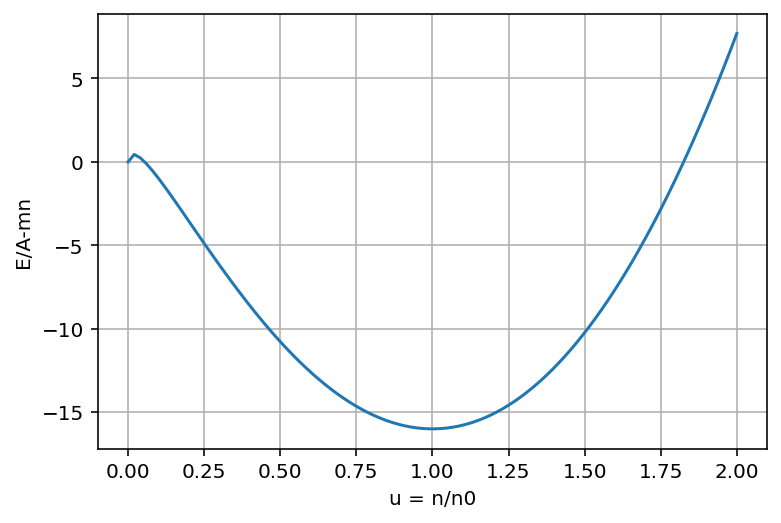

In [364]:
# average energy per nucleon - m_{n} (rest mass enegy)
def  E_A(u):
    return Ef0*(u)**(2/3) + (A/2)*u + (B/(σ+1))*(u**σ)

u = np.linspace(0,2,100)
plt.figure()
plt.grid()
plt.plot(u,E_A(u))
plt.xlabel('u = n/n0')
plt.ylabel('E/A-mn')
plt.show()

The expected features in the above plot include a minima at u = 1 (n = $n_{0}$) and the corresponding depth equal to BE = -16 MeV.  Since there exists a limit for the expression $\epsilon(n)$/n - $m_{n}$ at n = 0, there is a small positive valued bump at n = 0.

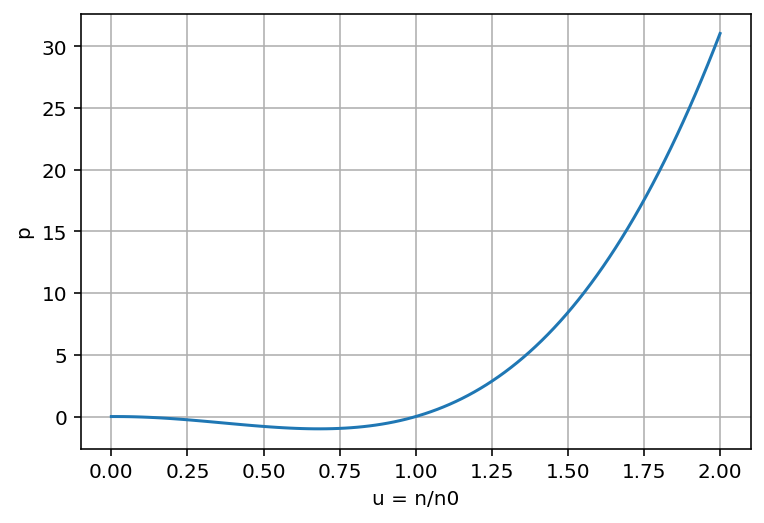

In [365]:
# Plotting the corresponding pressure as a function of u
def p_symm(u):
    return n0*((2/3)*Ef0*u**(5/3)+(A/2)*u**2+(B*σ/(σ+1))*u**(σ+1))

u = np.linspace(0,2,100)
plt.figure()
plt.grid()
plt.plot(u,p_symm(u))
plt.xlabel('u = n/n0')
plt.ylabel('p')
plt.show()

It is clear from the above figure that the EOS for the symmetric nuclear matter would only yield sensible results for n$\geq$ $n_{0}$ as the pressure values are negative for n$<$ $n_{0}$. Therefore, we are more interested in looking at EOS for non-symmetric nuclear matter (N>Z) and that will be our focus in the next section.

# Non-symmetric nuclear matter

Now we will consider different neutron and proton densities such that 
$$
\begin{align}
n_{n} = \frac{1+\alpha}{2}n
\end{align}
$$
$$
\begin{align}
n_{p} = \frac{1-\alpha}{2}n
\end{align}
$$
For pure neutron star, $\alpha$ = 1

The energy per nucleon can now be written as 
$$
\begin{align}
\frac{E(n,\alpha)}{A} = \frac{E(n,0)}{A} + \alpha^{2}S(n)
\end{align}
$$
The isospin symmetry breaking is proportional to $\alpha^{2}$ and S(u) has the form
$$
\begin{align}
S(u) = \left(2^{2/3}-1\right)\langle E_{f}^{0}\rangle\left(u^{2/3} - F(u)\right) +S_{0}F(u)
\end{align}
$$
where $S_{0}$ = 30 MeV is the bulk symmetry energy parameter. The function F(u) must satisfy F(0) = and F(1) = 1. Therefore, we choose F(u) = u.

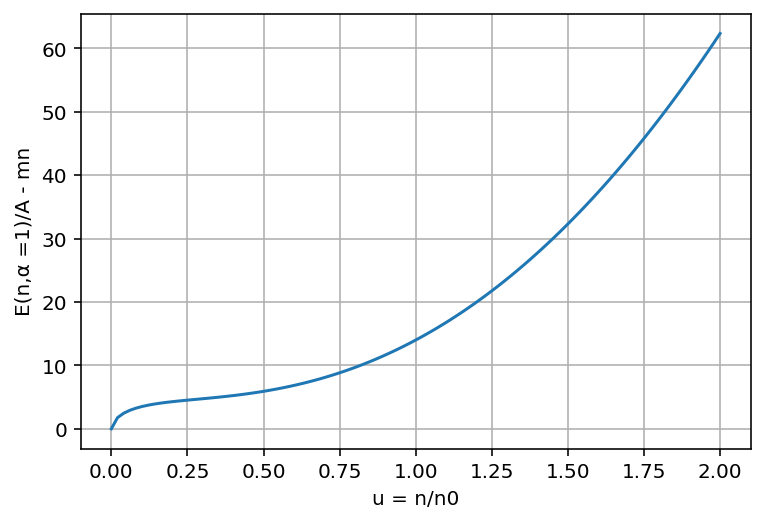

In [366]:
S0 = 30 # MeV
def F(u):
    return u
def S(u):
    return (2**(2/3)-1)*Ef0*(u**(2/3) - F(u)) + S0*F(u)

# average energy per nucleon (function of u and α) - m_{n} (rest mass enegy)
def E_A_α(u,α):
    return E_A(u)+ α**2*S(u)
    
plt.figure()
plt.grid()
plt.plot(u,E_A_α(u,1))
plt.xlabel('u = n/n0')
plt.ylabel('E(n,α =1)/A - mn')
plt.show()

The energy density $\epsilon(n,\alpha)$ can be written as 
$$
\begin{align}
\epsilon(n,\alpha) = n_{0}uE(n,\alpha)
\end{align}
$$
The corresponding pressure 
$$
\begin{align}
p(n,\alpha) = p(n, 0) + n_{0}\alpha^{2}\left[\frac{2^{2/3}-1}{3}\langle E_{f}^{0}\rangle(2u^{5/3} - 3u^{2}) +S_{0}u^{2}\right]
\end{align}
$$

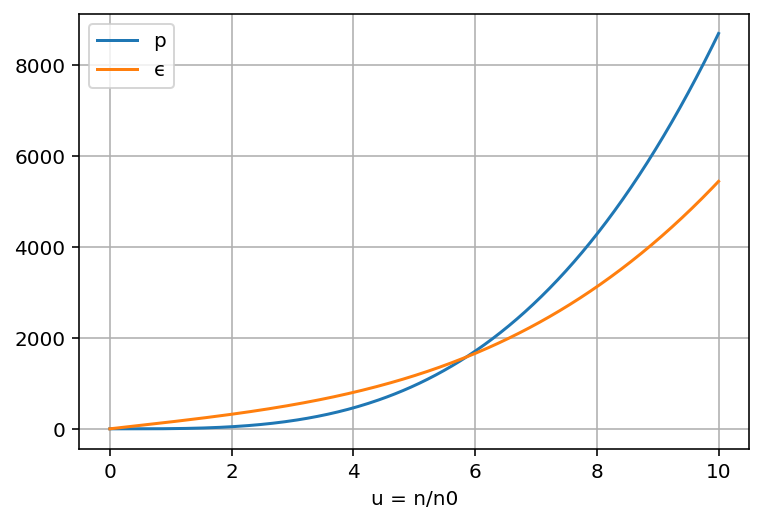

In [367]:
def p_antsymm(u,α):
    return p_symm(u)+(n0*α**2*(((2**(2/3)-1)/3)*Ef0*(2*u**(5/3)-3*u**2)+S0*u**2))

def ϵ_antsymm(u,α):
    return n0*u*(E_A_α(u,α)+ 939) # Adding rest mass energy back

u = np.linspace(0,10,300)

plt.figure()
plt.grid()
plt.plot(u,p_antsymm(u,1),label = 'p')
plt.plot(u,ϵ_antsymm(u,1),label = 'ϵ')
plt.xlabel('u = n/n0')
plt.legend()
plt.show()


The pressure exceeds the energy density at u = 6, This is due to our assumption F(u) = u. We are interested in the range $0\leq u\leq 5$. Therefore, we will try to find a fit between p and $\epsilon$ in this range to get a polytropic equation of state.

In [368]:
# Polyropic equation of state
def poly_fit(ϵ,γ, κ0):
    return κ0*ϵ**(γ)
u = np.linspace(0,5,200)
param,_ = so.curve_fit(poly_fit, ϵ_antsymm(u,1),p_antsymm(u,1))

print(f" The polytropic equation is p = {np.round(param[1],4)}ϵ^{np.round(param[0],1)}")


 The polytropic equation is p = 0.0003ϵ^2.1


Since the dominant term in p and $\epsilon$ goes as $u^{\sigma}$, $\sigma$ = 2.11, this violates causality as the speed of the sound in nuclear matter exceeds the speed of light. We will deal with this problem in the next section and find an equation of state which does not violates causality.

# Recovering Causality

We can recover causality  by making sure that $\epsilon(u)$ and p(u) grow no faster than $u^{2}$. This could be done by introducing a parameter C in the average energy energy per nucleon such that 
$$
\begin{align}
\frac{\epsilon(n)}{n} = m_{n} +\frac{3k_{f}^{2}}{5m_{n}}+\frac{A}{2}u+\frac{B}{\sigma+1}\frac{u^{\sigma}}{1+Cu^{\sigma-1}}
\end{align}
$$

We will choose a small value of C so that the term in the denominator dominates for very large value of u.

We will choose C = 0.2 and adjust A, B and $\sigma$ such that the plot of E/A - $m_{n}$ remains sensible.

-117.64411473788329


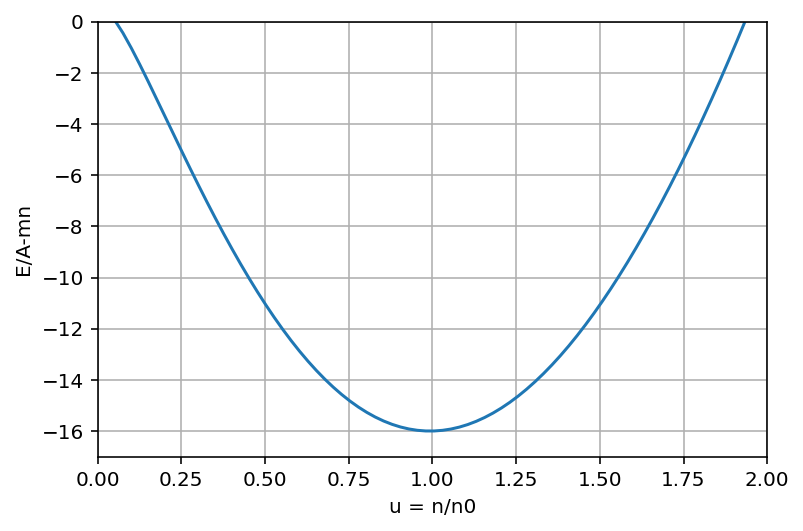

In [369]:
B = 83.8
C = 0.2
σ = 2.37 # hand tuned value 
# Calculating A for these changed values
A =2*(BE - Ef0- ((B/(σ+1))*(1/(1+C)))) 
print(A)
def  E_A_new(u):
    return Ef0*(u)**(2/3) + (A/2)*u + (B/(σ+1))*((u**σ)/(1+(C*u**(σ-1))))


u = np.linspace(0,5,200)
plt.figure()
plt.grid()
plt.xlim(0,2)
plt.ylim(-17,0)
plt.xlabel('u = n/n0')
plt.ylabel('E/A-mn')
plt.plot(u, E_A_new(u))
plt.show()

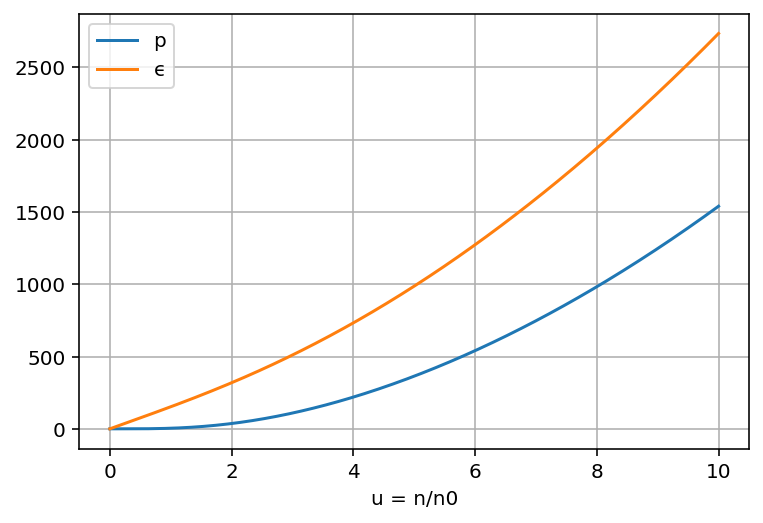

In [370]:
# Repeating the same steps for changed nuclear potential
def p_symm_new(u):
    return n0*((2/3)*Ef0*u**(5/3)+(A/2)*u**2+ (B/(σ+1))*((σ*u**(σ+1)+C*u**(2*σ))/(1+(C*u**(σ-1)))**2))
def E_A_α_new(u,α):
    return E_A_new(u)+ α**2*S(u)
def p_antsymm_new(u,α):
    return p_symm_new(u)+(n0*α**2*(((2**(2/3)-1)/3)*Ef0*(2*u**(5/3)-3*u**2)+S0*u**2))

def ϵ_antsymm_new(u,α):
    return n0*u*(E_A_α_new(u,α)+ 939)

u = np.linspace(0,10,300)

plt.figure()
plt.grid()
plt.plot(u,p_antsymm_new(u,1),label = 'p')
plt.plot(u,ϵ_antsymm_new(u,1),label = 'ϵ')
plt.xlabel('u = n/n0')
plt.legend()
plt.show()



In [378]:
# Polyropic equation of state
u = np.linspace(0,4.5,200)
param_new,_ = so.curve_fit(poly_fit, ϵ_antsymm_new(u,1),p_antsymm_new(u,1))
print(f" κ0 = {np.round(param_new[1],4)} and γ = {np.round(param_new[0],1)}")
print(f" The polytropic equation is p = {np.round(param_new[1],4)}ϵ^{np.round(param_new[0],0)}")


 κ0 = 0.0004 and γ = 2.0
 The polytropic equation is p = 0.0004ϵ^2.0


In [379]:
γ = 2 # New polytropic index
ϵ0 = ((sc.m_n**4)*(sc.c**5))/(3*(sc.pi**2)*sc.hbar**3)
κ0 = param_new[1]
κ0 = κ0*(1e-15)**3/(1.6022e-13) # Changing units to m^3/J
Kbar = ϵ0*κ0
A0 = (Kbar)**(-1/2)
α = A0*R0
β = (4*sc.pi*ϵ0)*A0/(Ms*sc.c**2)
α = α/10**3
β = β*(10**3)**3
ϵ0 = ϵ0*(10**3)**3

In [380]:
print(f"The value of α, β and ϵ0 is {np.round(α,4)} kms, {np.round(β,4)} km^(3) and {np.round(ϵ0/1e47,3)}e47 Jkm^(-3)")

The value of α, β and ϵ0 is 1.2794 kms, 0.0334 km^(3) and 0.005e47 Jkm^(-3)


In [264]:
r0 = 0.0001
r_end = 30
N = 2500
Np = 15000
p,dp = np.linspace(1e-4,800e-1,Np,retstep= True)
m0 = 0+1e-10
u0 = np.array([p0,
               m0])

Rad = np.zeros(Np)
Mass= np.zeros(Np)
for i in range(Np):
    Rad[i], Mass[i]= evolve_Neutron_special(TOV,r0,r_end,N,np.array([p[i],m0]),step=rk4)                              
            

<ipython-input-232-7db48df192a2>:4: RuntimeWarning: invalid value encountered in double_scalars
  A =  -(α*p**(1/γ)*m/(t**2))   # Newtonian term
<ipython-input-232-7db48df192a2>:11: RuntimeWarning: invalid value encountered in double_scalars
  dm = β*t**2*(p**(1/γ))


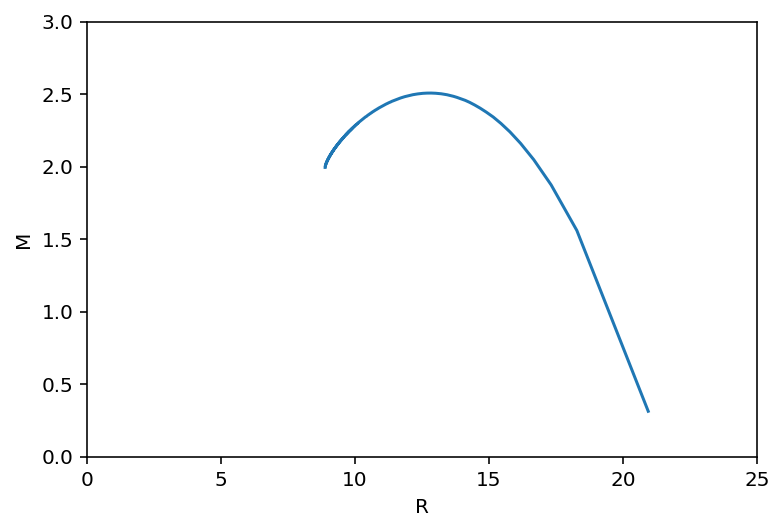

In [266]:
plt.figure()
plt.plot(Rad,Mass)
plt.xlabel('R')
plt.ylim(0,3)
plt.xlim(0,25)
plt.ylabel('M')
plt.show()

In [267]:
print(f"Maximum mass of a pure neutron star is {np.round(np.max(Mass),3)} times the mass of the sun and the radius of the star is {np.round(Rad[np.argmax(Mass)],2)} km. This happens at initial pressure p(0) = {np.round(p[np.argmax(Mass)],2)}")

Maximum mass of a pure neutron star is 2.508 times the mass of the sun and the radius of the star is 12.76 km. This happens at initial pressure p(0) = 0.13


Now, due to nucleon interactions , the mass of neutron star is 2.5 times the mass of sun and the radius of this star is 12.76 km. The star is way more massive and slightly larger in size than the Fermi gas model. The large value of mass is due to nuclear compressibilty $K_{0}$.

# Our result is in agreement with modern work taking account of the strong nuclear repulsion forces, which estimate the mass of star between 1.5 and 3.0 solar masses.